In [2]:
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import re
from unicodedata import normalize
import difflib

# EDA datos POLICIA

In [5]:
#Carga los datos completos de la tabla agrupada
crime_df=pd.read_csv('./crime.csv', low_memory=False)
crime_df['Unnamed: 0']=pd.to_datetime(crime_df['fecha'])
crime_df.rename(columns={'Unnamed: 0':'time'},inplace=True)

In [7]:
crime_df['fecha'].groupby(crime_df.time.dt.year).count()

time
2010     264302
2011     300464
2012     344890
2013     376083
2014     397133
2015     463429
2016     605621
2017     732613
2018    1123549
2019     807092
Name: fecha, dtype: int64

Text(0, 0.5, 'Total Number of Crimes')

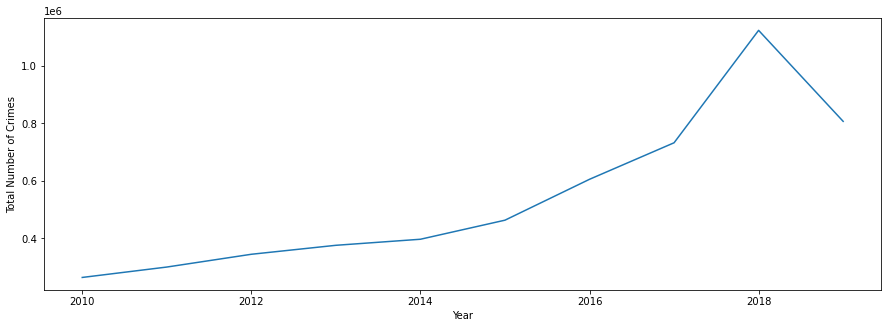

In [8]:
plt.figure(figsize=(15,5))
crime_df['fecha'].groupby(crime_df.time.dt.year).count().plot()
plt.xlabel("Year")
plt.ylabel("Total Number of Crimes")

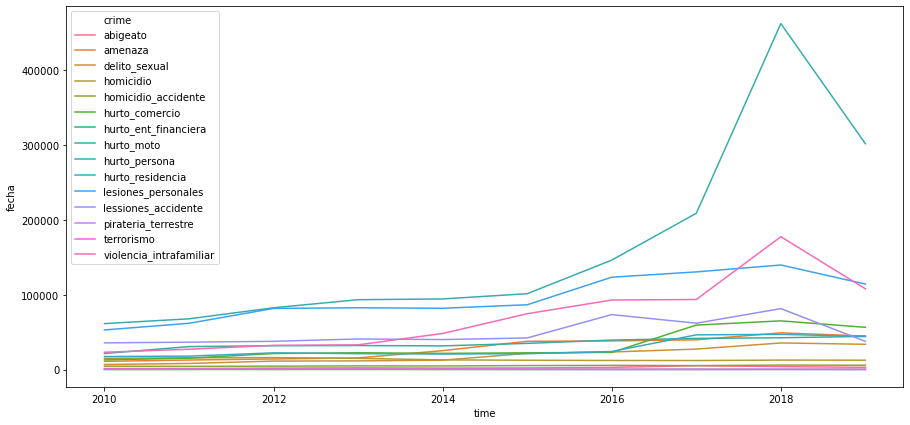

In [9]:
plt.figure(figsize=(15,7))
sns.lineplot(x='time',y='fecha',hue='crime',\
             data=crime_df[['crime','fecha']].groupby(['crime',crime_df.time.dt.year]).count().reset_index())

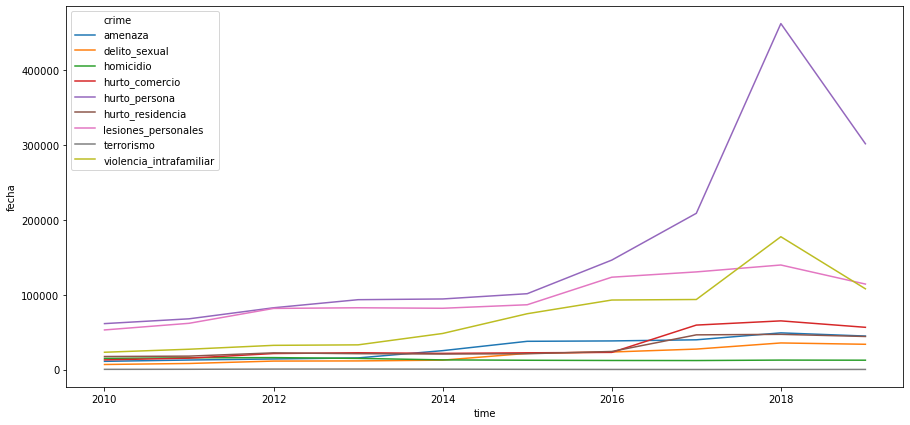

In [10]:
int_crimes=['hurto_persona','lesiones_personales','violencia_intrafamiliar','delito_sexual','terrorismo','hurto_comercio','hurto_residencia','homicidio','amenaza']
int_crime_df=crime_df[crime_df['crime'].isin(int_crimes)]

plt.figure(figsize=(15,7))
sns.lineplot(x='time',y='fecha',hue='crime',\
             data=int_crime_df[['crime','fecha']].groupby(['crime',crime_df.time.dt.year]).count().reset_index())

# Escolaridad

In [11]:
crime_df['escolaridad'].unique()

array(['SECUNDARIA', 'PRIMARIA', 'TECNICO', 'NO REPORTADO', 'SUPERIOR',
       '-', 'ANALFABETA', 'TECNOLOGO', nan, 'NOREPORTADO', 'NO REPORTADA'],
      dtype=object)

In [12]:
crime_df['escolaridad'].replace('-',np.nan,inplace=True)#[crime_df['escolaridad']=='-']=np.nan
crime_df['escolaridad'].replace('NO REPORTADO',np.nan,inplace=True)#[crime_df['escolaridad']=='NO REPORTADO']=np.nan
crime_df['escolaridad'].replace('NO REPORTADA',np.nan,inplace=True)#[crime_df['escolaridad']=='nan']=np.nan
crime_df['escolaridad'].replace('NOREPORTADO',np.nan,inplace=True)#[crime_df['escolaridad']=='NO REPORTADA']=np.nan
crime_df['escolaridad'].replace('nan',np.nan,inplace=True)#[crime_df['escolaridad']=='NOREPORTADO']=np.nan

int_crime_df=crime_df[crime_df['crime'].isin(int_crimes)]

In [14]:
crime_df[['crime','escolaridad','fecha']].groupby(['crime',crime_df.time.dt.year,'escolaridad']).count()


fecha
crime                   time escolaridad       
abigeato                2010 ANALFABETA      35
                             PRIMARIA       550
                             SECUNDARIA     513
                             SUPERIOR       159
                             TECNICO         39
...                                         ...
violencia_intrafamiliar 2019 PRIMARIA     16301
                             SECUNDARIA   43280
                             SUPERIOR      4921
                             TECNICO       8311
                             TECNOLOGO      225

[700 rows x 1 columns]

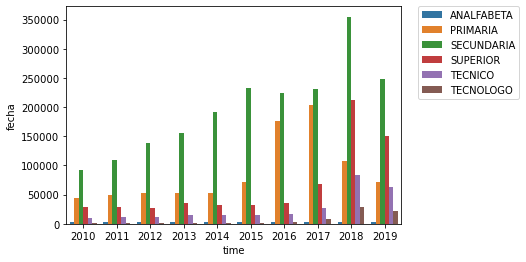

In [15]:
sns.barplot(x='time',y='fecha', hue='escolaridad', data=int_crime_df[['crime','escolaridad','fecha']].groupby([int_crime_df.time.dt.year,'escolaridad']).count().reset_index())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

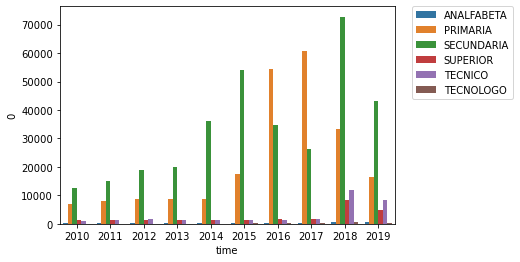

In [26]:
plt_crime='violencia_intrafamiliar'
plt_df=crime_df[crime_df['crime']==plt_crime]#['escolaridad','fecha']
plt_df=plt_df.groupby(['escolaridad',plt_df.time.dt.year]).size().reset_index()
sns.barplot(x='time',y=0, hue='escolaridad', data=plt_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

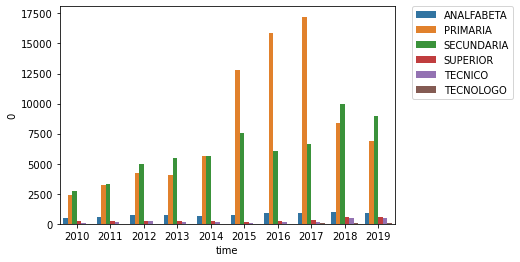

In [27]:
plt_crime='delito_sexual'
plt_df=crime_df[crime_df['crime']==plt_crime]#['escolaridad','fecha']
plt_df=plt_df.groupby(['escolaridad',plt_df.time.dt.year]).size().reset_index()
sns.barplot(x='time',y=0, hue='escolaridad', data=plt_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

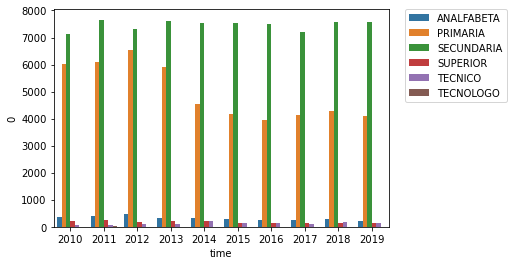

In [28]:
plt_crime='homicidio'
plt_df=crime_df[crime_df['crime']==plt_crime]#['escolaridad','fecha']
plt_df=plt_df.groupby(['escolaridad',plt_df.time.dt.year]).size().reset_index()
sns.barplot(x='time',y=0, hue='escolaridad', data=plt_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

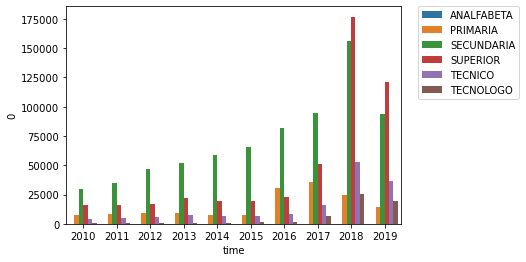

In [29]:
plt_crime='hurto_persona'
plt_df=crime_df[crime_df['crime']==plt_crime]#['escolaridad','fecha']
plt_df=plt_df.groupby(['escolaridad',plt_df.time.dt.year]).size().reset_index()
sns.barplot(x='time',y=0, hue='escolaridad', data=plt_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

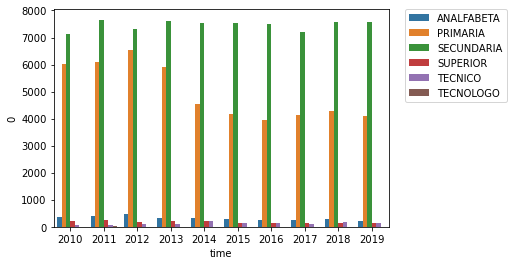

In [30]:
plt_crime='homicidio'
plt_df=crime_df[crime_df['crime']==plt_crime]#['escolaridad','fecha']
plt_df=plt_df.groupby(['escolaridad',plt_df.time.dt.year]).size().reset_index()
sns.barplot(x='time',y=0, hue='escolaridad', data=plt_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# By Departments

In [71]:
mun_code=pd.read_csv('codes_municip.csv')
depto_code=mun_code[['name_dept','cod_dept']].groupby('cod_dept').min().reset_index()
depto_code.head()

,cod_dept,name_dept
0,5,Antioquia
1,8,Atlantico
2,11,Bogota D.C.
3,13,Bolivar
4,15,Boyaca


In [72]:
depto_crime=pd.read_csv('./depto_crime.csv')
depto_crime.drop('Unnamed: 0',axis=1,inplace=True)
depto_crime=depto_crime.merge(depto_code, how='left', on='cod_dept')
depto_crime

,cod_dept,year,amenaza,delito_sexual,homicidio,hurto_comercio,hurto_persona,hurto_residencia,lesiones_personales,terrorismo,violencia_intrafamiliar,total_crimes,name_dept
0,5,2010,212.0,292.0,2939.0,564.0,2148.0,380.0,2076.0,47.0,783.0,15601,Antioquia
1,5,2011,144.0,279.0,3132.0,700.0,2381.0,368.0,2812.0,68.0,949.0,24230,Antioquia
2,5,2012,NaN,344.0,3318.0,1536.0,4220.0,888.0,4383.0,90.0,1501.0,29727,Antioquia
3,5,2013,268.0,454.0,2757.0,1732.0,5522.0,934.0,3876.0,137.0,1771.0,31233,Antioquia
4,5,2014,2092.0,947.0,2225.0,2367.0,7383.0,1296.0,6244.0,104.0,5412.0,40969,Antioquia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,99,2015,33.0,26.0,17.0,16.0,16.0,29.0,30.0,NaN,21.0,238,Vichada
326,99,2016,44.0,17.0,15.0,12.0,60.0,38.0,101.0,NaN,31.0,383,Vichada
327,99,2017,74.0,26.0,23.0,62.0,48.0,114.0,120.0,NaN,63.0,599,Vichada
328,99,2018,41.0,31.0,22.0,65.0,92.0,73.0,123.0,NaN,82.0,592,Vichada


In [42]:
crime_df.head(2)#[['cod_dept','departamento']]

,time,fecha,departamento,municipio,dia,hora,barrio,zona,clase_sitio,arma,...,descripcion_conducta,clase_empresa,clase,marca,linea,modelo,color,delito,cantidad,crime
0,2010-01-01,2010-01-01 00:00:00,HUILA,CAMPOALEGRE,Viernes,11:00:00,EL VISO,RURAL,POTREROS,NO REPORTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abigeato
1,2010-01-01,2010-01-01 00:00:00,META,SAN JUAN DE ARAMA,Viernes,10:00:00,ESPERANZA,URBANA,POTREROS,NO REPORTADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abigeato


In [73]:
def department_to_region(input_dept):
    output_var = 'None'
    dict_region = {
        'Andina':['Antioquia', 'Boyaca', 'Caldas', 'Cundinamarca', 'Huila',
                  'Norte de Santander', 'Quindio','Risaralda','Santander', 'Tolima', 'Bogota D.C.'],
        'Caribe':['Atlantico', 'Bolivar', 'Cesar', 'Cordoba', 'La Guajira', 'Magdalena',
                  'San Andres', 'Sucre'],
        'Amazonica':['Amazonas', 'Caqueta', 'Guainia', 'Guaviare', 'Putumayo', 'Vaupes'],
        'Pacifica':['Cauca', 'Choco', 'Narino', 'Valle del Cauca'],
        'Orinoquia':['Arauca', 'Casanare', 'Meta', 'Vichada'],
        
    }
    for k in dict_region.keys():
        if(input_dept in dict_region[k]):
            output_var = k
    return output_var


depto_crime['region'] = depto_crime['name_dept'].apply(department_to_region)

In [74]:
desertion=pd.read_csv('desertion_by_dept.csv')
#desertion.head()
depto_crime=depto_crime.merge(desertion[['CODE_DEPT','YEAR','DESERTION_PERC','DESERTION_NO']], how='left', left_on=['cod_dept','year'],\
                             right_on=['CODE_DEPT','YEAR'])
depto_crime.head()

,cod_dept,year,amenaza,delito_sexual,homicidio,hurto_comercio,hurto_persona,hurto_residencia,lesiones_personales,terrorismo,violencia_intrafamiliar,total_crimes,name_dept,region,CODE_DEPT,YEAR,DESERTION_PERC,DESERTION_NO
0,5,2010,212.0,292.0,2939.0,564.0,2148.0,380.0,2076.0,47.0,783.0,15601,Antioquia,Andina,NaN,NaN,NaN,NaN
1,5,2011,144.0,279.0,3132.0,700.0,2381.0,368.0,2812.0,68.0,949.0,24230,Antioquia,Andina,5.0,2011.0,4.179032,46903.230417
2,5,2012,NaN,344.0,3318.0,1536.0,4220.0,888.0,4383.0,90.0,1501.0,29727,Antioquia,Andina,5.0,2012.0,4.398943,45864.646431
3,5,2013,268.0,454.0,2757.0,1732.0,5522.0,934.0,3876.0,137.0,1771.0,31233,Antioquia,Andina,5.0,2013.0,3.576000,41308.654454
4,5,2014,2092.0,947.0,2225.0,2367.0,7383.0,1296.0,6244.0,104.0,5412.0,40969,Antioquia,Andina,5.0,2014.0,2.448480,26343.794812


In [60]:
depto_crime.columns

Index(['cod_dept', 'year', 'amenaza', 'delito_sexual', 'homicidio',
       'hurto_comercio', 'hurto_persona', 'hurto_residencia',
       'lesiones_personales', 'terrorismo', 'violencia_intrafamiliar',
       'total_crimes', 'name_dept', 'region', 'CODE_DEPT', 'DESERTION_PERC',
       'DESERTION_NO'],
      dtype='object')

<Figure size 1440x2160 with 0 Axes>

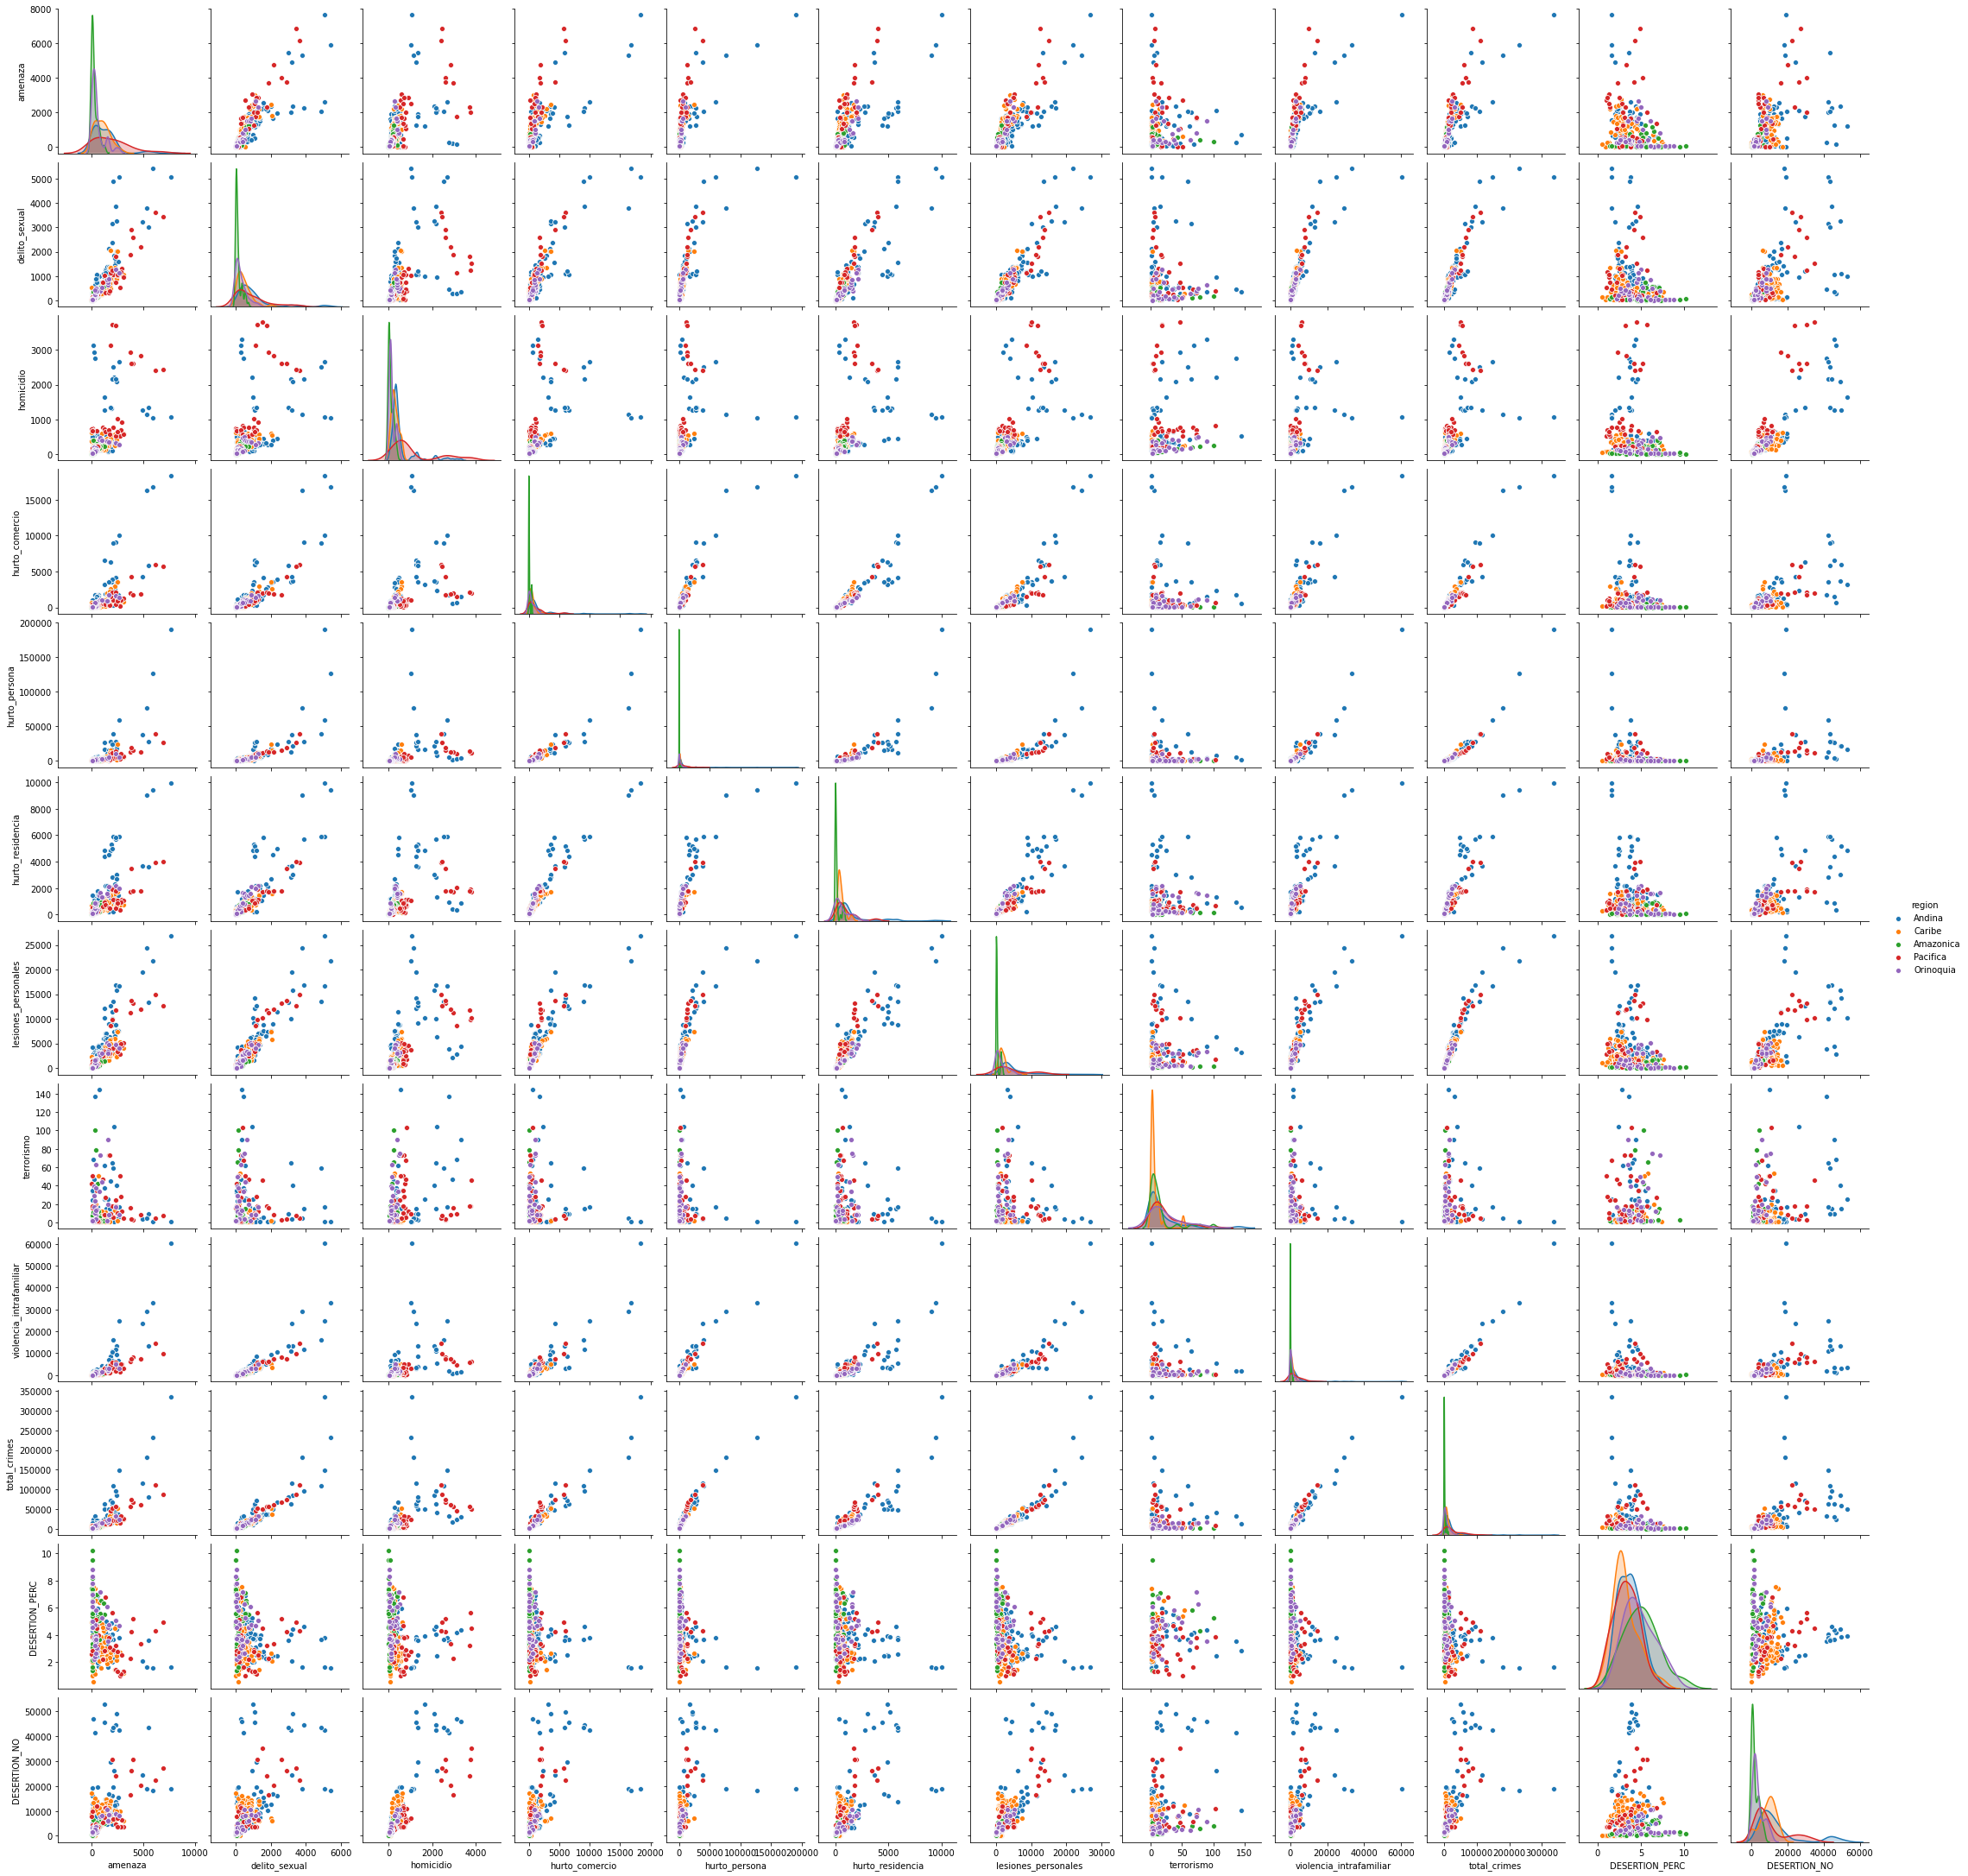

In [75]:
sns.pairplot(depto_crime[['amenaza', 'delito_sexual', 'homicidio',\
       'hurto_comercio', 'hurto_persona', 'hurto_residencia',\
       'lesiones_personales', 'terrorismo', 'violencia_intrafamiliar',\
       'total_crimes', 'region', 'DESERTION_PERC','DESERTION_NO']],hue='region')


# By municipality

In [40]:
mun_crime=pd.read_csv('./mun_crime.csv')
mun_crime.drop('Unnamed: 0',axis=1,inplace=True)
mun_crime.head()

,cod_municipio,year,amenaza,delito_sexual,homicidio,hurto_comercio,hurto_persona,hurto_residencia,lesiones_personales,terrorismo,violencia_intrafamiliar,total_crimes
0,5001,2010,44.0,54.0,1399.0,229.0,1383.0,108.0,624.0,5.0,291.0,8088
1,5001,2011,8.0,54.0,1549.0,289.0,1433.0,103.0,767.0,7.0,399.0,14202
2,5001,2012,NaN,57.0,1240.0,855.0,2734.0,380.0,1953.0,9.0,658.0,17598
3,5001,2013,9.0,126.0,913.0,1063.0,3539.0,418.0,1825.0,7.0,749.0,17973
4,5001,2014,989.0,309.0,649.0,1359.0,4948.0,523.0,2604.0,NaN,2766.0,22782
